In [1]:
import actionet
import scanpy as sc
import anndata
import matplotlib.pyplot as plt

In [2]:
adata = anndata.read_h5ad("../data/test_adata_post.h5ad")

In [3]:
actionet.preprocessing.filter_anndata(adata, min_cells_per_feat=0.01, inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4, inplace=True)
sc.pp.log1p(adata, base=2, copy=True)

AnnData object with n_obs × n_vars = 6790 × 14409
    obs: 'Barcode', 'CellLabel', 'assigned_archetype'
    var: 'ENSEMBL', 'Gene', 'Chromosome', 'Biotype'
    uns: 'action_params', 'log1p'
    obsm: 'C_merged', 'C_stacked', 'H_merged', 'H_stacked', 'action', 'action_B', 'archetype_footprint', 'umap'
    varm: 'action_A', 'action_V'
    layers: 'logcounts'
    obsp: 'actionet'

In [4]:
actionet.reduce_kernel(adata, n_components=30, key_added='action', inplace=True)

Performing SVD using IRLB (sparse) -- A: 14409 x 6790


In [5]:
actionet.run_actionet(adata, k_max=30, inplace=True)

done


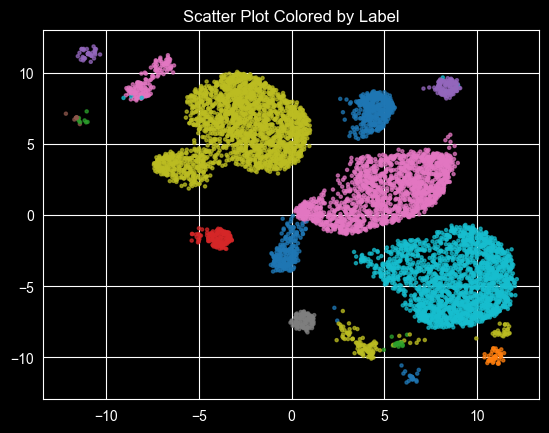

In [6]:
labels = adata.obs['CellLabel'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['umap'][:, 0],
    y=adata.obsm['umap'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    alpha=0.7,
    s = 5
)
plt.title('Scatter Plot Colored by Label')
plt.show()